This tutorial reproduces the results of Tutorial 36 on spinw.org. It is the about the anisotropic exchange on the Ferromagnetic chain.

Get Packages

In [2]:
using Sunny,GLMakie,CairoMakie

Set up the system. Define the lattice. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. The space group is P1 or 1. This space group is chosen to reduce the symmetry in the system and allow all possible exchanges.

In [3]:
a = 4;
b = 4;
c = 3;
latvecs = lattice_vectors(a, b, c, 90, 90, 90)
positions=[[0,0,0]]
cryst = Crystal(latvecs,positions,1)
view_crystal(cryst)
print_symmetry_table(cryst,8)
sys=System(cryst, (1,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

Atom 1
Position [0, 0, 0], multiplicity 1
Allowed g-tensor: [  A F+I E-H
                   F-I   B D+G
                   E+H D-G   C]
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,-2] + c₂*𝒪[2,-1] + c₃*𝒪[2,0] + c₄*𝒪[2,1] + c₅*𝒪[2,2] +
    c₆*𝒪[4,-4] + c₇*𝒪[4,-3] + c₈*𝒪[4,-2] + c₉*𝒪[4,-1] + c₁₀*𝒪[4,0] + c₁₁*𝒪[4,1] + c₁₂*𝒪[4,2] + c₁₃*𝒪[4,3] + c₁₄*𝒪[4,4] +
    c₁₅*𝒪[6,-6] + c₁₆*𝒪[6,-5] + c₁₇*𝒪[6,-4] + c₁₈*𝒪[6,-3] + c₁₉*𝒪[6,-2] + c₂₀*𝒪[6,-1] + c₂₁*𝒪[6,0] + c₂₂*𝒪[6,1] + c₂₃*𝒪[6,2] + c₂₄*𝒪[6,3] + c₂₅*𝒪[6,4] + c₂₆*𝒪[6,5] + c₂₇*𝒪[6,6]

Bond(1, 1, [0, 0, -1])
Distance 3, coordination 2
Connects [0, 0, 0] to [0, 0, -1]
Allowed exchange matrix: [  A F+I E-H
                          F-I   B D+G
                          E+H D-G   C]
Allowed DM vector: [G H I]

Bond(1, 1, [-1, 0, 0])
Distance 4, coordination 2
Connects [0, 0, 0] to [-1, 0, 0]
Allowed exchange matrix: [  A F+I E-H
                          F-I   B D+G
                          E+H D-G   C]
Allowed DM vector: [G H I]

Bond(1

System [Dipole mode]
Lattice (1×1×1)×1
Energy per site 0


Set up the exchanges. Note that J is a matrix here and hence the exchange is anisotropic. Randomize the spins and minimize the energy to attain the ground state.

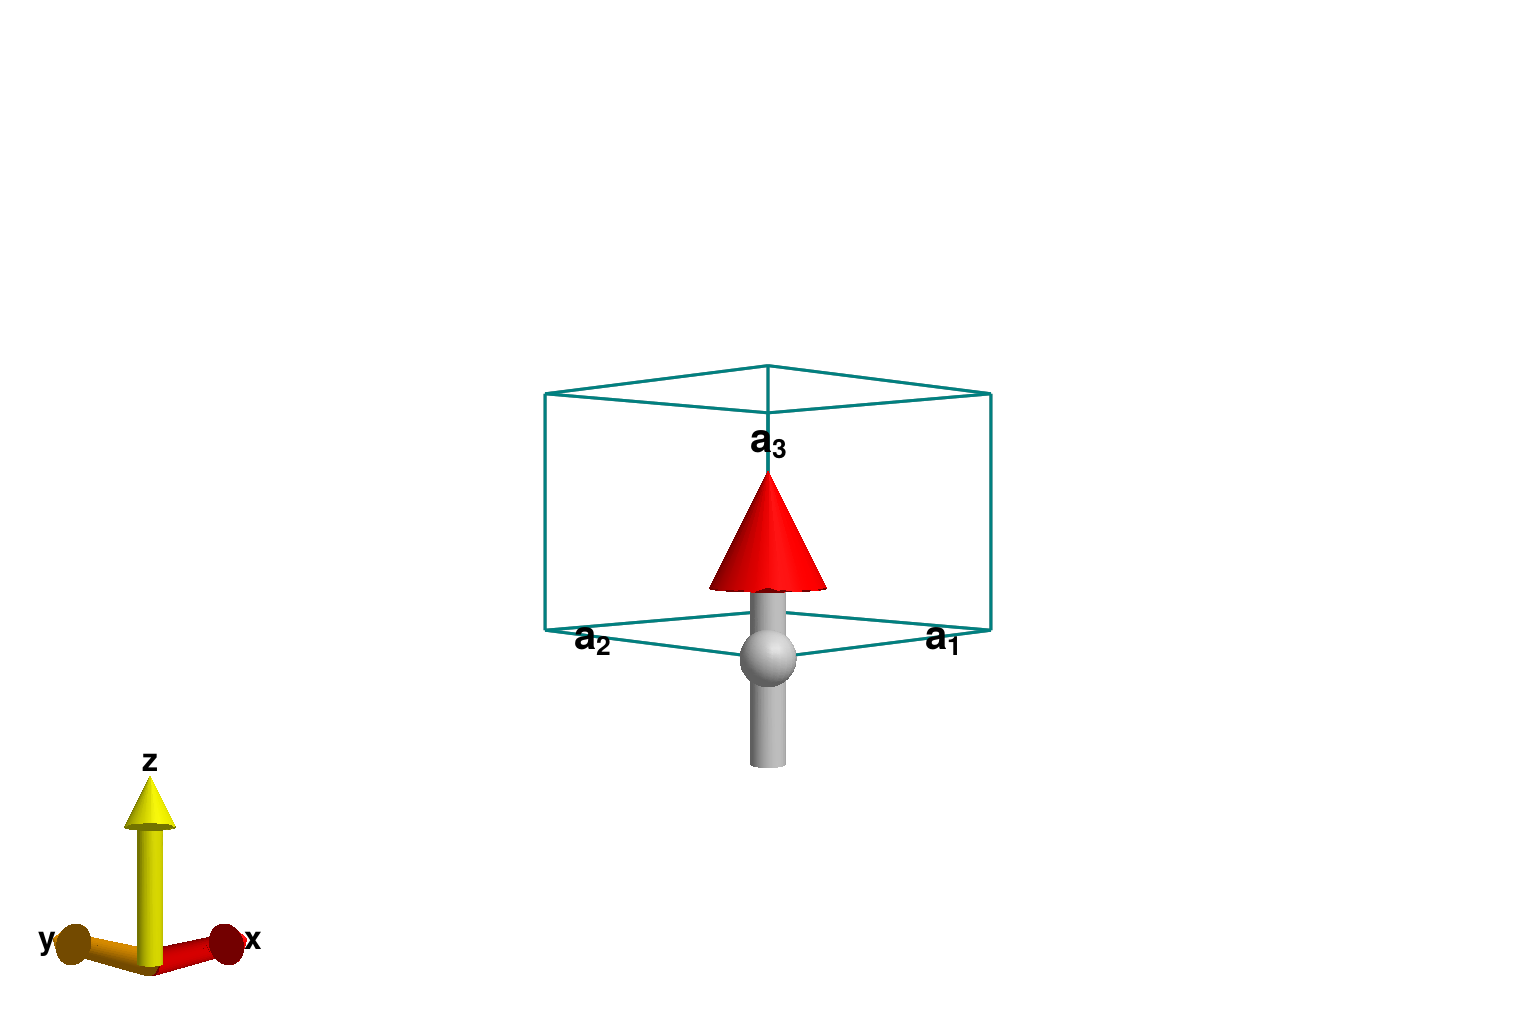

In [4]:
J_1=[-3 0 0;0 -4 0;0 0 -5]
set_exchange!(sys,J_1,Bond(1, 1, [1, 0, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Set up the spinw object and the path to obtain the dispersion and the intensity bands.

In [5]:
q_points=[[0,0,0],[1,0,0]]
density = 200
path, xticks = reciprocal_space_path(cryst, q_points, density);
swt=SpinWaveTheory(sys)
formula = intensity_formula(swt, :perp; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

Plot the spin-spin correlations and convoluted spectras.

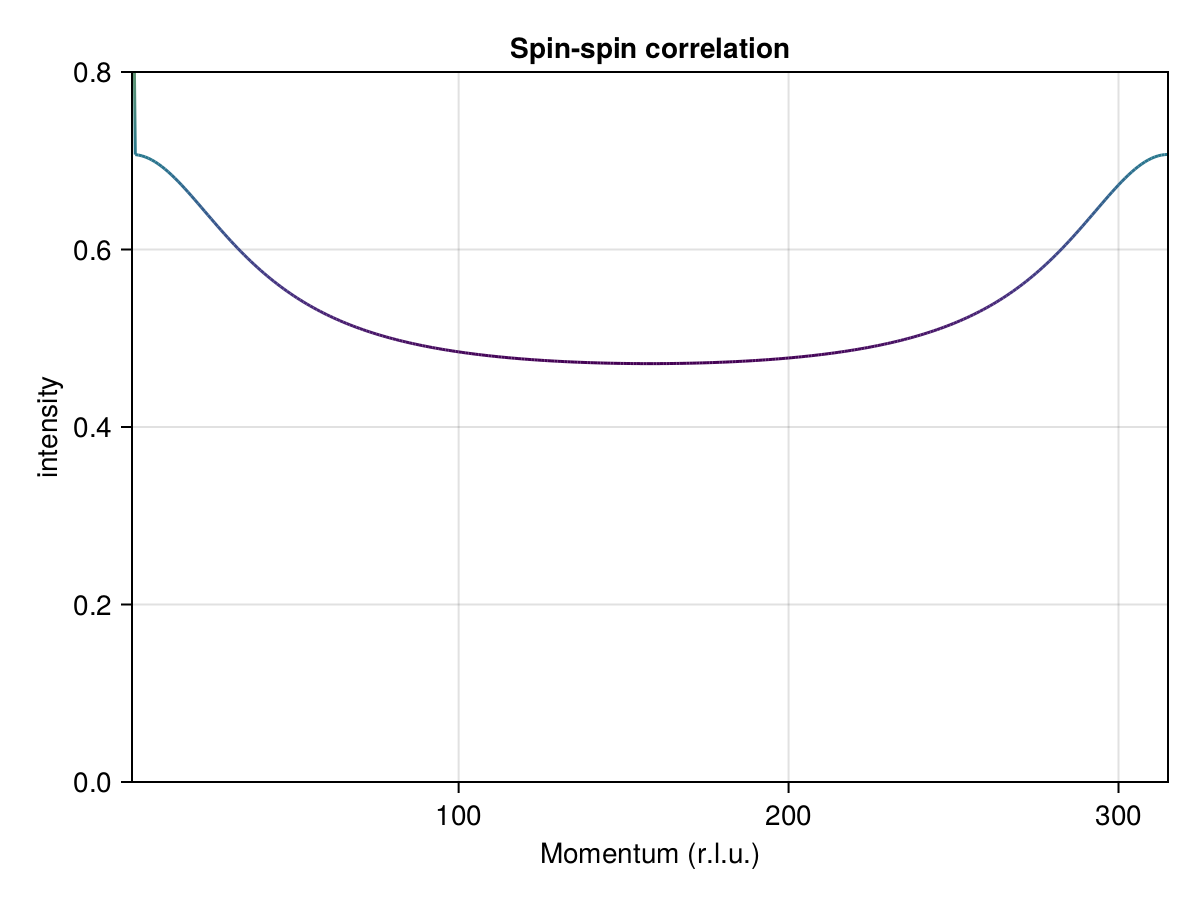

In [6]:
CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="intensity",title="Spin-spin correlation")
ylims!(ax, 0, 0.8)
xlims!(ax, 1, size(disp, 1))
colorrange = extrema(intensity)
for i in axes(disp)[2]
    lines!(ax, 1:length(intensity[:,i]), intensity[:,i]; color=intensity[:,i], colorrange)
end
fig

Anisotropic exchange on the AFM chain

Set up the system. Only the J matrix has changed.

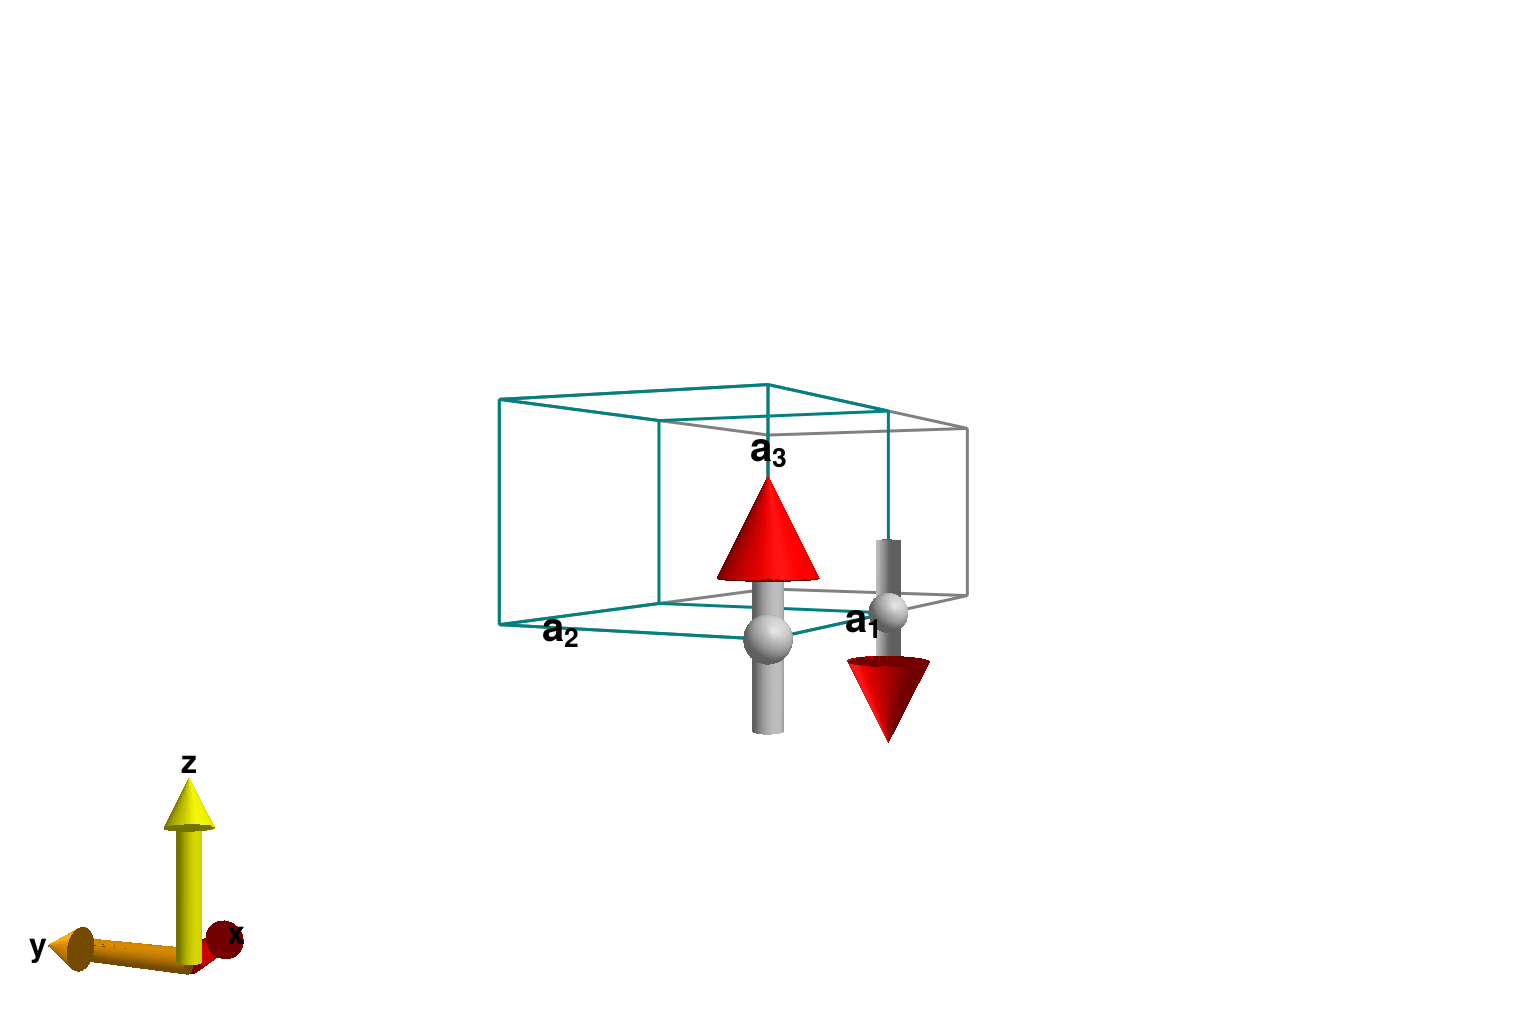

In [7]:
sys2=System(cryst, (2,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

J_2=[3 0 0;0 4 0;0 0 4.1]

set_exchange!(sys2,J_2,Bond(1, 1, [1, 0, 0]))
randomize_spins!(sys2)
minimize_energy!(sys2)
plot_spins(sys2)

LSWT calculations and plot of dispersion and convoluted spectra.

In [8]:
q_points=[[0,0,0],[1,0,0]]
density = 200
path, xticks = reciprocal_space_path(cryst, q_points, density);
swt=SpinWaveTheory(sys2)
formula = intensity_formula(swt, :full; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

The intensities Sxx, Syy, and Szz have been plot separately. The intensity for Szz is zero because its coming from longitudinal fluctuations. Sunny currently doesn't have the ability to obtain longitudinal fluctuations.

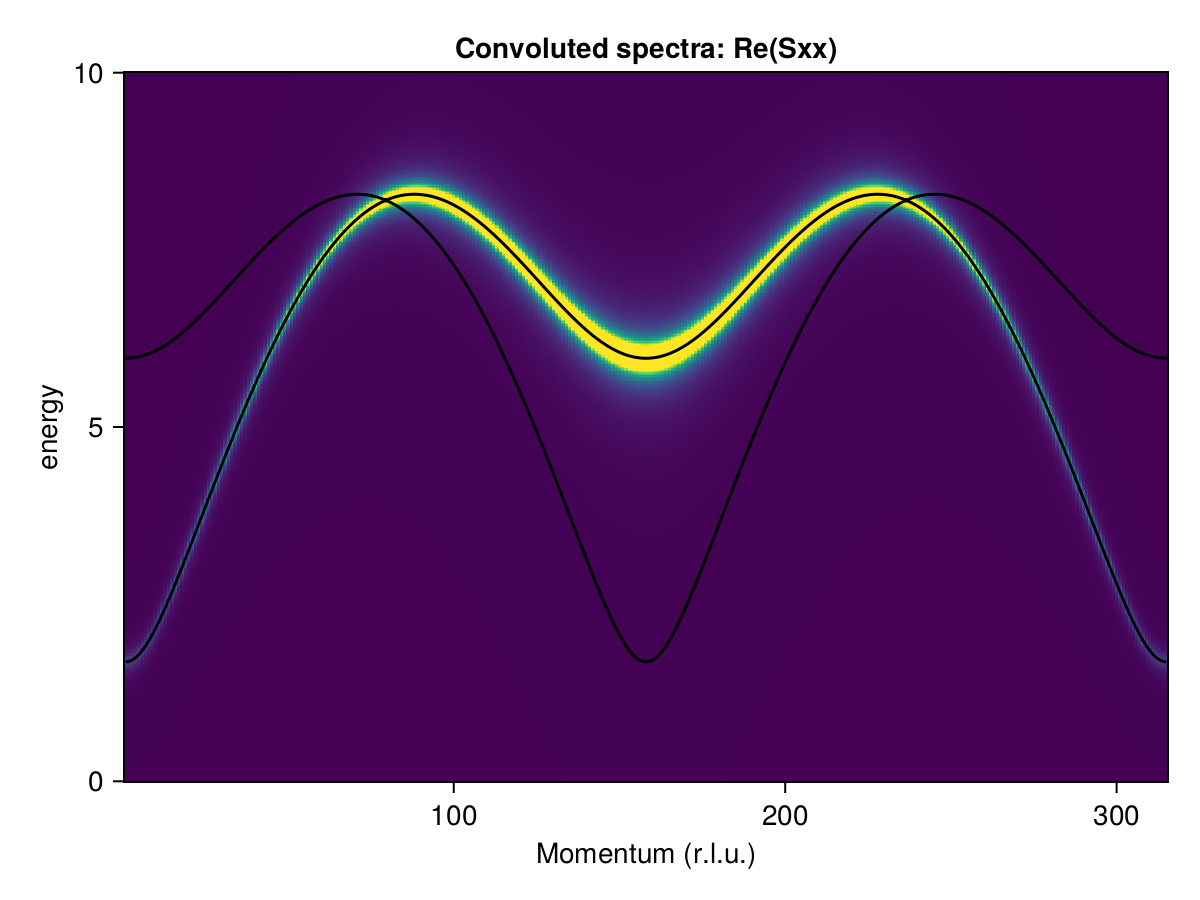

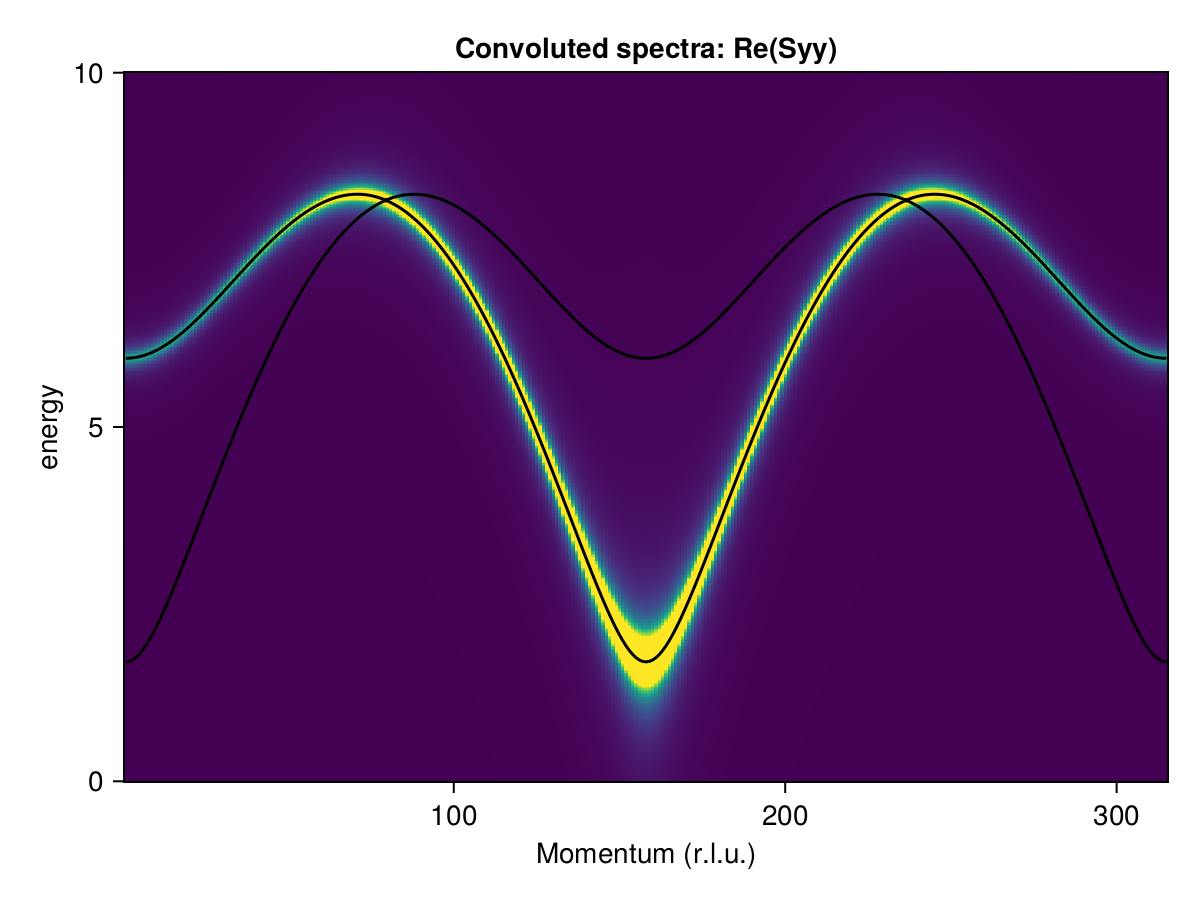

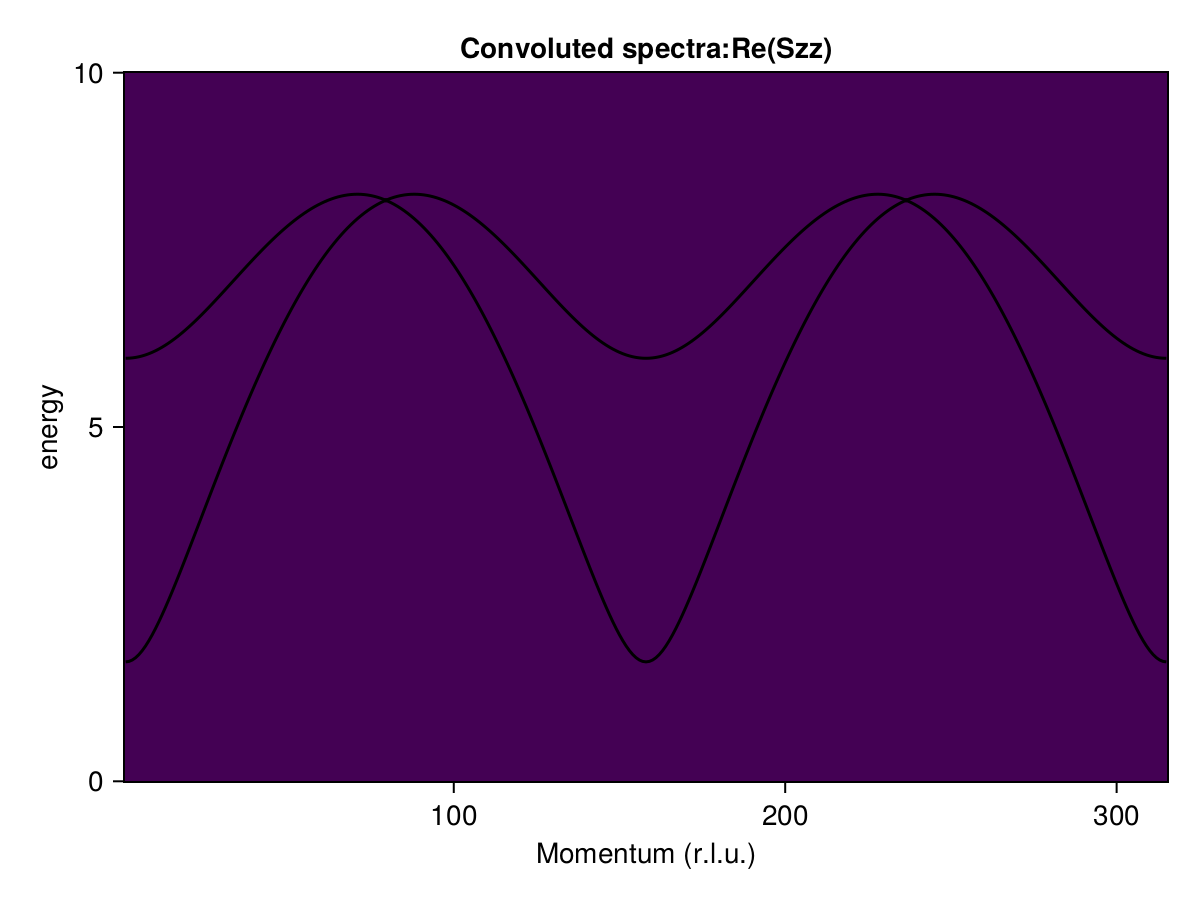

CairoMakie.Screen{IMAGE}


In [10]:
γ = 0.1;
broadened_formula = intensity_formula(swt, :full; kernel=lorentzian(γ));
energies = collect(0:0.02:10);
is = intensities_broadened(swt, path, energies, broadened_formula)
###calculating Sxx,Syy,Szz
is1=zeros(ComplexF64,length(path),length(energies));
is2=zeros(ComplexF64,length(path),length(energies));
is3=zeros(ComplexF64,length(path),length(energies));
for i  in 1:length(path)
    for j in 1:length(energies)
        is1[i,j] = is[i,j][1,1]
        is2[i,j] = is[i,j][2,2]
        is3[i,j] = is[i,j][3,3]
    end
end 

CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="energy",title="Convoluted spectra: Re(Sxx)")
heatmap!(ax, 1:size(is, 1), energies,is1,colorrange=(0,1));
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black")
end
display(fig)
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="energy",title="Convoluted spectra: Re(Syy)")
heatmap!(ax, 1:size(is, 1), energies,is2,colorrange=(0,1));
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black")
end
display(fig)
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="energy",title="Convoluted spectra:Re(Szz)")
heatmap!(ax, 1:size(is, 1), energies,is3,colorrange=(0,1));
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black")
end
display(fig)


Anisotropic exchange on the AFM chain (rotated anisotropy)

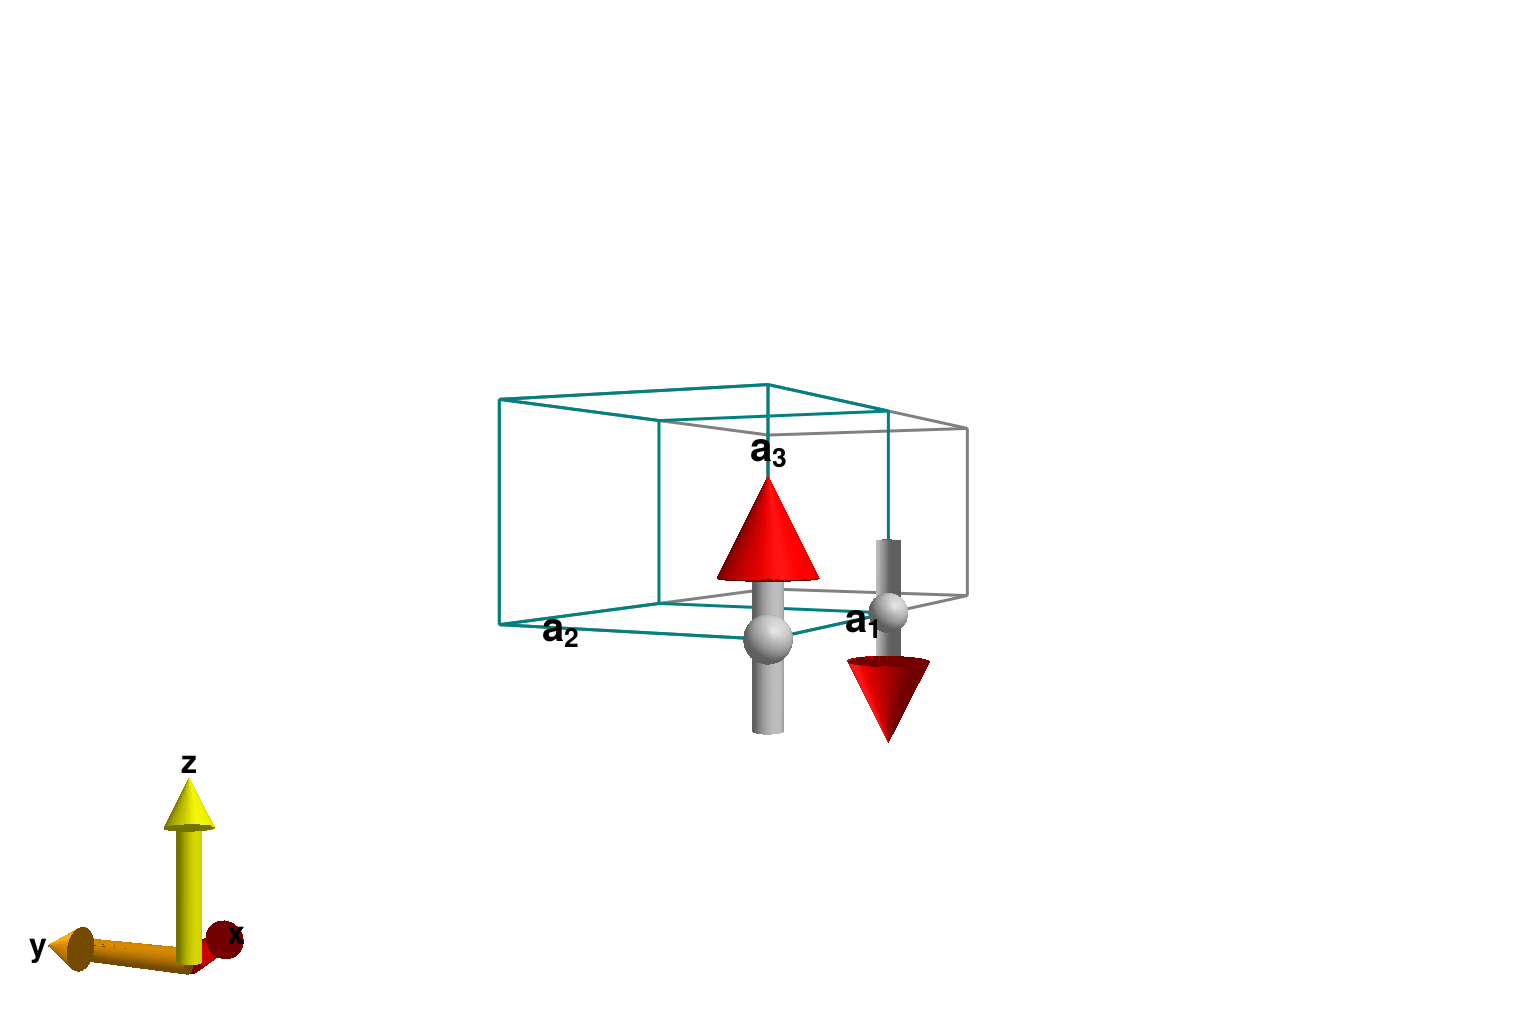

In [11]:
θ=45

rot_mat=[cos(θ*pi/180) -sin(θ*pi/180) 0;sin(θ*pi/180) cos(θ*pi/180) 0;0 0 1]
J_3=rot_mat*J_2*rot_mat'
sys3=System(cryst, (2,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)
set_exchange!(sys3,J_2,Bond(1, 1, [1, 0, 0]))
randomize_spins!(sys3)
minimize_energy!(sys3)
plot_spins(sys3)

LSWT calculation and Plot of dispersion and convoluted spectra. 

In [12]:
q_points=[[0,0,0],[1,0,0]]
density = 200
path, xticks = reciprocal_space_path(cryst, q_points, density);
swt=SpinWaveTheory(sys3)
formula = intensity_formula(swt, :full; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

The intensities Sxx+Sxy and Sxx-Sxy have been plotted separately.

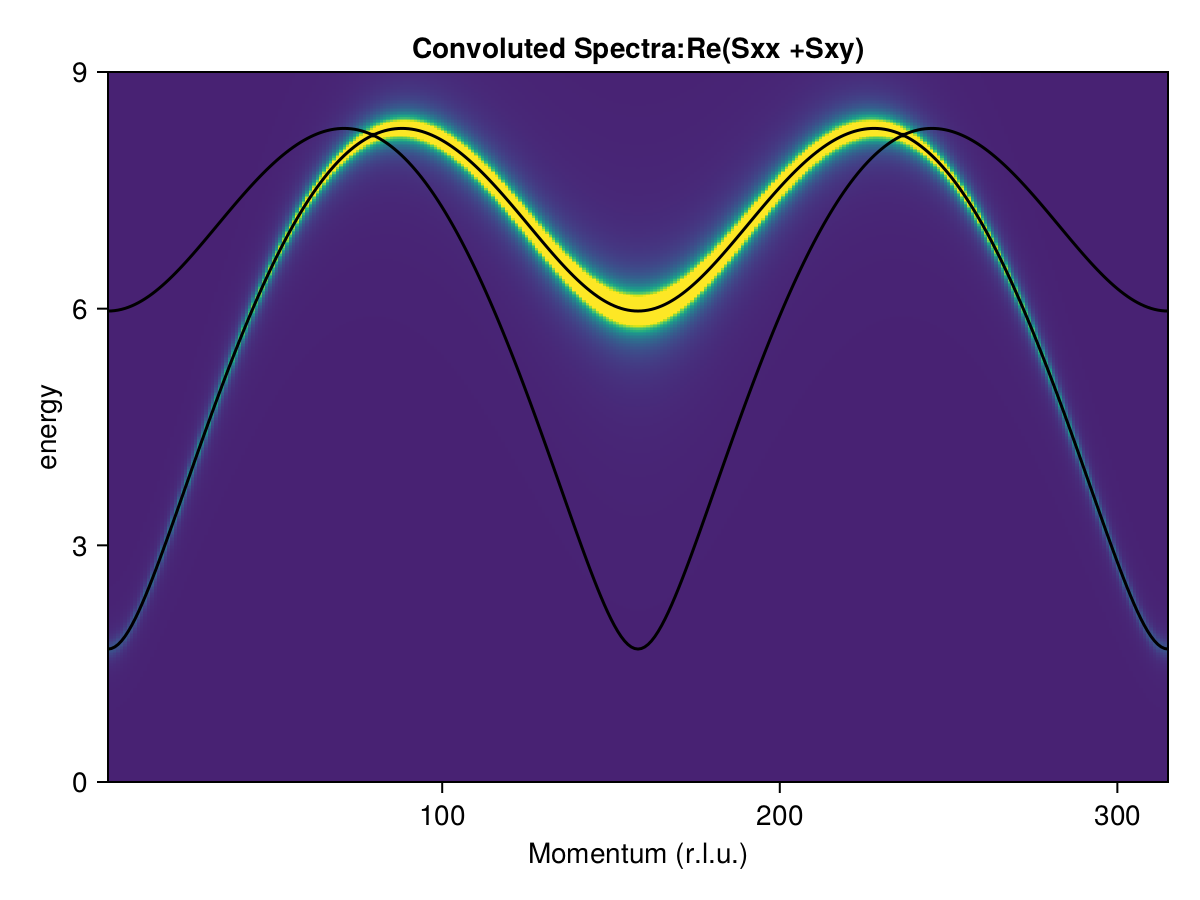

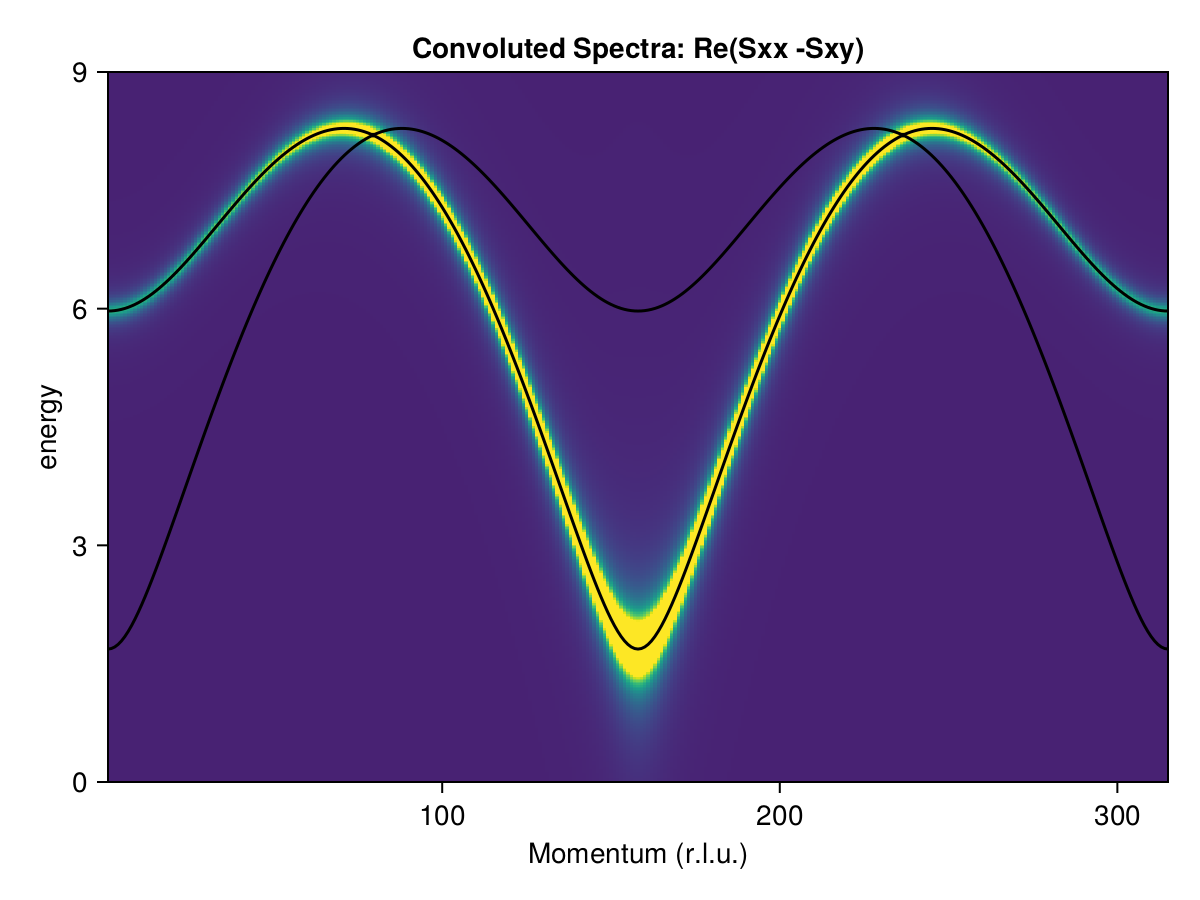

CairoMakie.Screen{IMAGE}


In [15]:
γ = 0.1;
broadened_formula = intensity_formula(swt, :full; kernel=lorentzian(γ));
energies = collect(0:0.02:10);
is = intensities_broadened(swt, path, energies, broadened_formula)

is1=zeros(ComplexF64,length(path),length(energies));
is2=zeros(ComplexF64,length(path),length(energies));
###calculating Sxx+Sxy,Sxx-Sxy
for i  in 1:length(path)
    for j in 1:length(energies)
        is1[i,j] = is[i,j][1,1]+is[i,j][1,2]## Sxx+Sxy
        is2[i,j] = is[i,j][2,2]-is[i,j][1,2] ## Sxx-Sxy   
    end
end 

CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="energy",title="Convoluted Spectra:Re(Sxx +Sxy)")
ylims!(ax, 0, 9)
xlims!(ax, 1, size(disp, 1))
pl=heatmap!(ax, 1:size(is, 1), energies,real(is1),colorrange=(-0.1,1));
#pl.colormap = Reverse(:redsblues)

for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black")
end
display(fig)
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Momentum (r.l.u.)", ylabel="energy",title="Convoluted Spectra: Re(Sxx -Sxy)")
ylims!(ax, 0, 9)
xlims!(ax, 1, size(disp, 1))
pl=heatmap!(ax, 1:size(is, 1), energies,real(is2),colorrange=(-0.1,1));
#pl.colormap = Reverse(:redsblues)

for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i]; color="black")
end
display(fig)
